# Weight Initialization: 
- weight initialization play crucial role in training of deep neural network if weight is not initialize properly then we can face some problems like.
- vanishing gradient problem
- exploding gradient problem
- slow convergence.
  
for avoid all these problem we need weight initialization

# Why we should avoid Zero Weight Initialization:
## 1. when Activation function is Relu:
for any output of neuron can present by this
 - z11 = w1x1 + w2x2 + b1, activation value a11 a11 = max(0,z11)
 - if we set w1 = w2 = 0 , b1 =0 then z11 will so a11 will also zero.
 - when activation value will zero then as know that derivation of loss function wrt w11 ($L/$w) depend on activation value so it will zero.
 - in backpropagation
   1. w' = w - learning_rate *($L/$w)
   2. w' = w  **($L/$w = 0) **
 - so weight and will update so neural network will not train
  # No update case, no training will take place

## 2. when activation function is tanh: 
  - activation value for a11 = (e^z - e^-z) / (e^z + e^-z)
  - when weight , bias value has initialized 0 the, z = 0 so a11 will also 0

same problem like above no update no training during backpropogation
## 3. when activation function is sigmoid :
- activation value for a11 = 1 / (1+ e^-z)
- when z = 0 ,then a11 = 0.5 which close to zero

so again it will not update weight and bias value so training will stop


# Import Libraries and Load Dataset

In [10]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ushape/ushape.csv


In [11]:
df = pd.read_csv('/kaggle/input/ushape/ushape.csv')

In [12]:
df.head()

,3.159499363321345566e-02,9.869877579082642072e-01,0.000000000000000000e+00
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0


In [13]:
# rename the column
df.rename(columns = {'3.159499363321345566e-02':'X','9.869877579082642072e-01':'Y','0.000000000000000000e+00':'class'},inplace=True)

In [14]:
df.head()

,X,Y,class
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0


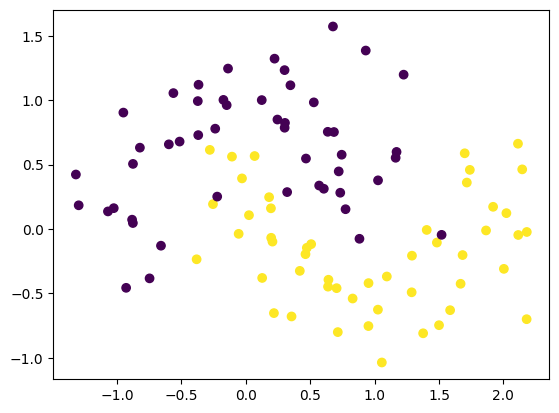

In [16]:
plt.scatter(df['X'],df['Y'],c=df['class'])

In [ ]:
# split X and y

In [17]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [ ]:
# model building

In [18]:
import tensorflow 
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [19]:
model = Sequential()

model.add(Dense(10,activation = 'sigmoid',input_dim=2))
model.add(Dense(1,activation = 'sigmoid'))

In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41 (164.00 B)

 Trainable params: 41 (164.00 B)

 Non-trainable params: 0 (0.00 B)

In [21]:
# Set parameter to 0
model.get_weights()

[array([[-0.00291806, -0.22931948, -0.5104693 , -0.10463327,  0.59916514,
         -0.09422266,  0.4808777 , -0.26827127,  0.43914098,  0.16583419],
        [ 0.4466241 ,  0.02522659, -0.31305885, -0.36617315,  0.6177588 ,
          0.637613  ,  0.05840272,  0.10367113, -0.16433376, -0.30991066]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.09554219],
        [-0.7242201 ],
        [ 0.3764879 ],
        [-0.52737516],
        [-0.7284738 ],
        [-0.25638485],
        [-0.48032576],
        [-0.06059957],
        [-0.07118046],
        [ 0.22097003]], dtype=float32),
 array([0.], dtype=float32)]

In [22]:
initial_weights = model.get_weights()

In [23]:
initial_weights[0] = np.zeros(model.get_weights()[0].shape)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.zeros(model.get_weights()[2].shape)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)

In [24]:
model.set_weights(initial_weights)

In [25]:
model.get_weights()

[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [28]:
model.compile(loss='binary_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

In [29]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - accuracy: 0.3735 - loss: 0.6934 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5422 - loss: 0.6929 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4875 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4993 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4875 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5149 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5071 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5032 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss

In [30]:
model.get_weights()

[array([[ 0.44392923,  0.44392923,  0.44392923,  0.44392923,  0.44392923,
          0.44392923,  0.44392923,  0.44392923,  0.44392923,  0.44392923],
        [-0.48598304, -0.48598304, -0.48598304, -0.48598304, -0.48598304,
         -0.48598304, -0.48598304, -0.48598304, -0.48598304, -0.48598304]],
       dtype=float32),
 array([-0.14032921, -0.14032921, -0.14032921, -0.14032921, -0.14032921,
        -0.14032921, -0.14032921, -0.14032921, -0.14032921, -0.14032921],
       dtype=float32),
 array([[0.05938106],
        [0.05938106],
        [0.05938106],
        [0.05938106],
        [0.05938106],
        [0.05938106],
        [0.05938106],
        [0.05938106],
        [0.05938106],
        [0.05938106]], dtype=float32),
 array([-0.06248545], dtype=float32)]

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


<Axes: >

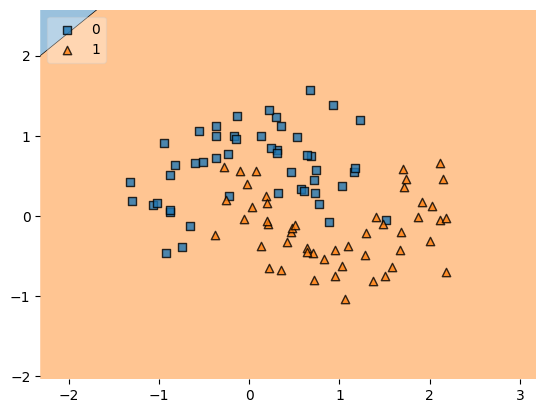

In [31]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'),clf = model,legend=2)